# calibration


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def least_squares_analysis(x_values, y_values=None, title="Least Squares Analysis", xlab='x', ylab='y'):
    """
    Perform least squares regression, show plot with regression results,
    and display the calculation table in separate figures.

    Parameters
    ----------
    y_values : list or array
        Dependent variable values (y).
    x_values : list or array, optional
        Independent variable values (x). If None, uses 1,2,...,N.
    title : str, optional
        Title for the figures.
    xlab : str, optional
        Label for the x-axis.
    ylab : str, optional
        Label for the y-axis.
    """

    # Convert to numpy arrays
    y = np.array(y_values, dtype=float)
    if x_values is None:
        x = np.arange(1, len(y) + 1, dtype=float)
    else:
        x = np.array(x_values, dtype=float)

    # Perform least-squares fit: y = m*x + c
    A = np.vstack([x, np.ones(len(x))]).T
    slope, intercept = np.linalg.lstsq(A, y, rcond=None)[0]

    # Fitted values and residuals
    y_fit = slope * x + intercept
    residuals = y - y_fit
    N = len(x)

    # --- Error Calculations ---
    # Standard error of the estimate (sigma_y)
    sigma_y = np.sqrt(np.sum(residuals**2) / (N - 2))

    # Sum of squares of x
    Sxx = np.sum((x - np.mean(x))**2)

    # Error in slope (standard error)
    err_slope = sigma_y / np.sqrt(Sxx)

    # Error in intercept (standard error)
    err_intercept = sigma_y * np.sqrt(np.sum(x**2) / (N * Sxx))

    # Create DataFrame table for display
    df = pd.DataFrame({
        "x": x,
        "y": y,
        "x²": x**2,
        "xy": x * y
    })
    totals = pd.DataFrame({
        "x": [np.sum(x)],
        "y": [np.sum(y)],
        "x²": [np.sum(x**2)],
        "xy": [np.sum(x * y)]
    }, index=["Σ"])
    table = pd.concat([df, totals])

    # --- Figure 1: Regression Plot ---
    fig1, ax1 = plt.subplots(figsize=(8, 6))
    ax1.scatter(x, y, color='blue', label="Data points")
    ax1.plot(x, y_fit, color='red', label="Best Fit Line")

    textstr = '\n'.join((
        f"Slope (m)      : {slope:.4f} ± {err_slope:.4f}",
        f"Intercept (c)  : {intercept:.4f} ± {err_intercept:.4f}",
        "",
        f"Equation: y = {slope:.4f}x + {intercept:.4f}"
    ))
    ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="wheat", alpha=0.5))

    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    ax1.legend()
    ax1.set_title(title)
    ax1.grid(True)
    fig1.tight_layout()

    # # --- Figure 2: Calculation Table ---
    # fig2, ax2 = plt.subplots(figsize=(6, 3))
    # ax2.axis('tight')
    # ax2.axis('off')
    # table_fig = ax2.table(cellText=table.round(3).values,
    #                       colLabels=table.columns,
    #                       rowLabels=table.index,
    #                       cellLoc='center', loc='center')
    # table_fig.auto_set_font_size(False)
    # table_fig.set_fontsize(12)
    # table_fig.scale(1.2, 1.2)
    # ax2.set_title(f"{title} - Calculation Data", pad=20)
    # fig2.tight_layout()

    plt.show()

    # Return results in case needed programmatically
    return {
        # "slope": slope,
        # "intercept": intercept,
        # "slope_error": err_slope,
        # "intercept_error": err_intercept,
        # "table": table
    }


In [ ]:
V_sig_rms_1=[0.0025,0.00375,0.005,0.00625,0.0075,0.00875]
V_sig_rms=[0.0025,0.00375,0.005,0.00625,0.0075,0.00875,0.01,0.01125,0.0125]


#gain = 50
vdc1=[0.097,0.123,0.277,0.26,0.303,0.337]
vdc2=[0.1,0.188,0.277,0.27,0.351,0.437]
vdc3=[0.102,0.192,0.285,0.258,0.35,0.434]
vdc4=[0.101,0.186,0.279,0.264,0.34,0.427,0.507,0.597,0.672]
vdc5=[0.101,0.188,0.279,0.254,0.339,0.428,0.511,0.595,0.676]

#gain = 100
vdc1_g100=[0.255,0.402,0.605,0.549,0.715,0.885,1.042,1.201,1.357]
vdc2_g100=[0.25,0.423,0.598,0.576,0.719,0.884,1.06,1.222,1.377]
vdc3_g100=[0.248,0.421,0.596,0.566,0.721,0.886,1.057,1.207,1.366]
vdc4_g100=[0.251,0.402,0.598,0.567,0.715,0.885,1.042,1.212,1.345]
vdc5_g100=[0.247,0.418,0.596,0.547,0.719,0.893,1.052,1.216,1.366]

least_squares_analysis(V_sig_rms_1, vdc1, title="f=300 Gain=50", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(V_sig_rms_1, vdc2, title="f=600 Gain=50", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(V_sig_rms_1, vdc3, title="f=900 Gain=50", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(V_sig_rms, vdc4, title="f=1200 Gain=50", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(V_sig_rms, vdc5, title="f=1500 Gain=50", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(V_sig_rms, vdc1_g100, title="f=300 Gain=100", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(V_sig_rms, vdc2_g100, title="f=600 Gain=100", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(V_sig_rms, vdc3_g100, title="f=900 Gain=100", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(V_sig_rms, vdc4_g100, title="f=1200 Gain=100", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(V_sig_rms, vdc5_g100, title="f=1500 Gain=100", xlab="V_sig_rms (V)", ylab="V_dc (V)")

data1 = {
        'x': [1, 2, 3, 4, 5, 6],
        'y': [2.1, 3.9, 6.2, 7.8, 10.1, 12.0],
        'label': 'Experiment A'
    }

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_multi_least_squares(datasets, title="Least Squares Analysis", xlab='x', ylab='y', ax=None):
    """
    Perform least squares regression for multiple datasets and plot them on a single figure.

    Parameters
    ----------
    datasets : list of dicts
        A list where each dictionary contains data for one set.
        Each dict should have:
        - 'y': (list or array) Dependent variable values.
        - 'x': (list or array, optional) Independent variable values. If None, uses 1, 2, ..., N.
        - 'label': (str, optional) A label for this dataset.
    title : str, optional
        Title for the plot.
    xlab : str, optional
        Label for the x-axis.
    ylab : str, optional
        Label for the y-axis.
    ax : matplotlib.axes.Axes, optional
        An existing axes object to plot on. If None, a new figure and axes will be created.
    """

    # --- Figure Handling ---
    if ax is None:
        # If no axes are provided, create a new figure and axes
        fig, ax = plt.subplots(figsize=(10, 8))
        show_plot = True
    else:
        # If axes are provided, use them and get their figure
        fig = ax.get_figure()
        show_plot = False # Don't show the plot automatically, let the caller decide

    all_results = []

    # Use matplotlib's default color cycle
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    for i, dataset in enumerate(datasets):
        color = colors[i % len(colors)]
        
        # --- Data Preparation ---
        y_values = dataset.get('y')
        if y_values is None:
            print(f"Skipping dataset {i} due to missing 'y' data.")
            continue
            
        x_values = dataset.get('x')
        label = dataset.get('label', f'Dataset {i+1}')

        # Convert to numpy arrays
        y = np.array(y_values, dtype=float)
        if x_values is None:
            x = np.arange(1, len(y) + 1, dtype=float)
        else:
            x = np.array(x_values, dtype=float)

        if len(x) != len(y):
            print(f"Skipping dataset '{label}': x and y have different lengths.")
            continue
        
        # --- Perform least-squares fit: y = m*x + c ---
        A = np.vstack([x, np.ones(len(x))]).T
        try:
            slope, intercept = np.linalg.lstsq(A, y, rcond=None)[0]
        except np.linalg.LinAlgError as e:
            print(f"Failed to fit dataset '{label}': {e}")
            continue

        # Fitted values and residuals
        y_fit = slope * x + intercept
        residuals = y - y_fit
        N = len(x)

        # --- Error Calculations ---
        err_slope = np.nan
        err_intercept = np.nan
        sigma_y = np.nan
        Sxx = np.nan

        # Errors can only be calculated if N > 2 (degrees of freedom > 0)
        if N > 2:
            try:
                # Standard error of the estimate (sigma_y)
                sigma_y = np.sqrt(np.sum(residuals**2) / (N - 2))
                
                # Sum of squares of x
                Sxx = np.sum((x - np.mean(x))**2)
                
                if Sxx > 0: # Avoid division by zero
                    # Error in slope (standard error)
                    err_slope = sigma_y / np.sqrt(Sxx)

                    # Error in intercept (standard error)
                    err_intercept = sigma_y * np.sqrt(np.sum(x**2) / (N * Sxx))
            except Exception as e:
                print(f"Warning: Could not calculate errors for '{label}': {e}")
                
        # --- Store Results ---
        results = {
            "label": label,
            "slope": slope,
            "intercept": intercept,
            "slope_error": err_slope,
            "intercept_error": err_intercept,
            "N": N,
            "sigma_y": sigma_y,
            "Sxx": Sxx
        }
        all_results.append(results)

        # --- Plotting ---
        # Plot data points
        ax.scatter(x, y, color=color, label=f"{label} (Data)")
        
        # Plot best-fit line
        fit_label = f"{label} (Fit: y = {slope:.3f}x + {intercept:.3f})"
        ax.plot(x, y_fit, color=color, linestyle='--', label=fit_label)

    # --- Finalize Plot ---
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.legend(fontsize='small') # Use smaller font for legend if it's crowded
    ax.set_title(title, fontsize='medium') # Use medium font for subplot titles
    ax.grid(True)
    
    if show_plot:
        # If we created our own figure, apply tight_layout and show it
        fig.tight_layout()
        plt.show()

    # Return results
    return all_results


if __name__ == '__main__':
    V_sig_rms_1=[0.0025,0.00375,0.005,0.00625,0.0075,0.00875]
    V_sig_rms=[0.0025,0.00375,0.005,0.00625,0.0075,0.00875,0.01,0.01125,0.0125]


    #gain = 50
    vdc1=[0.097,0.123,0.277,0.26,0.303,0.337]
    vdc2=[0.1,0.188,0.277,0.27,0.351,0.437]
    vdc3=[0.102,0.192,0.285,0.258,0.35,0.434]
    vdc4=[0.101,0.186,0.279,0.264,0.34,0.427,0.507,0.597,0.672]
    vdc5=[0.101,0.188,0.279,0.254,0.339,0.428,0.511,0.595,0.676]

    #gain = 100
    vdc1_g100=[0.255,0.402,0.605,0.549,0.715,0.885,1.042,1.201,1.357]
    vdc2_g100=[0.25,0.423,0.598,0.576,0.719,0.884,1.06,1.222,1.377]
    vdc3_g100=[0.248,0.421,0.596,0.566,0.721,0.886,1.057,1.207,1.366]
    vdc4_g100=[0.251,0.402,0.598,0.567,0.715,0.885,1.042,1.212,1.345]
    vdc5_g100=[0.247,0.418,0.596,0.547,0.719,0.893,1.052,1.216,1.366]

    # --- Create list of ALL datasets ---
    # Note: We create a list of single-item-lists for the function
    all_datasets_info = [
        {'x': V_sig_rms_1, 'y': vdc1, 'label': 'f=300Hz Gain=50'},
        {'x': V_sig_rms_1, 'y': vdc2, 'label': 'f=600Hz Gain=50'},
        {'x': V_sig_rms_1, 'y': vdc3, 'label': 'f=900Hz Gain=50'},
        {'x': V_sig_rms, 'y': vdc4, 'label': 'f=1200Hz Gain=50'},
        {'x': V_sig_rms, 'y': vdc5, 'label': 'f=1500Hz Gain=50'},
        {'x': V_sig_rms, 'y': vdc1_g100, 'label': 'f=300Hz Gain=100'},
        {'x': V_sig_rms, 'y': vdc2_g100, 'label': 'f=600Hz Gain=100'},
        {'x': V_sig_rms, 'y': vdc3_g100, 'label': 'f=900Hz Gain=100'},
        {'x': V_sig_rms, 'y': vdc4_g100, 'label': 'f=1200Hz Gain=100'},
        {'x': V_sig_rms, 'y': vdc5_g100, 'label': 'f=1500Hz Gain=100'},
    ]

    # --- Create a single figure with a 2x5 grid of subplots ---
    fig, axes = plt.subplots(
        nrows=2, 
        ncols=5, 
        figsize=(22, 9), # Adjusted for better aspect ratio (more square plots)
        sharex=True,      # Share x-axis for all plots (good for comparison)
        sharey='row'      # Share y-axis *per row* (Gain 50 / Gain 100)
    )
    
    # Flatten the 2D array of axes for easy iteration
    axes_flat = axes.flatten()
    
    fig.suptitle("Calibration of the lock in amplifier", fontsize=16, y=1.03)

    all_analysis_results = []

    # --- Loop and call the function for each dataset on its own subplot ---
    for i, dataset_info in enumerate(all_datasets_info):
        ax = axes_flat[i]
        
        # We wrap the single dataset_info dict in a list because
        # plot_multi_least_squares expects a list of datasets
        dataset_list = [dataset_info] 
        
        # Set x/y labels only for the outer plots to reduce clutter
        set_xlab = (i >= 5) # Only set x-label for the bottom row (indices 5-9)
        set_ylab = (i % 5 == 0) # Only set y-label for the left column (indices 0, 5)

        xlab = "V_sig_rms (V)" if set_xlab else ""
        ylab = "V_dc (V)" if set_ylab else ""

        print(f"Performing analysis for: {dataset_info['label']}...")
        results = plot_multi_least_squares(
            dataset_list,
            title=dataset_info['label'], # Use the label as the title for the subplot
            xlab=xlab,
            ylab=ylab,
            ax=ax  # Pass the specific subplot's axes
        )
        all_analysis_results.extend(results)

    # --- Hide any unused subplots if we had an odd number (not needed for 10) ---
    # if len(all_datasets_info) < len(axes_flat):
    #     for j in range(len(all_datasets_info), len(axes_flat)):
    #         axes_flat[j].axis('off')

    # --- Show the single figure with all 10 plots ---
    fig.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to make room for suptitle
    plt.show()

    # --- Print all results ---
    print("\n--- Combined Analysis Results ---")
    
    # Prepare data for tables
    gain_50_data = []
    gain_100_data = []

    for res in all_analysis_results:
        # Print individual results
        print(f"\nResults for: {res['label']}")
        print(f"  Equation: y = {res['slope']:.4f}x + {res['intercept']:.4f}")
        print(f"  Slope (m)      : {res['slope']:.4f} ± {res['slope_error']:.4f}")
        print(f"  Intercept (c)  : {res['intercept']:.4f} ± {res['intercept_error']:.4f}")

        # Extract data for summary tables
        label = res['label']
        try:
            # Parse 'f=300 Gain=50' format
            parts = label.split(' ')
            freq_str = parts[0].split('=')[1]
            gain_str = parts[1].split('=')[1]
            
            freq = int(freq_str)
            gain = int(gain_str)
            
            table_row = {
                "Frequency (Hz)": freq,
                "Slope (m)": res['slope'],
                "Slope Error (±)": res['slope_error']
            }
            
            if gain == 50:
                gain_50_data.append(table_row)
            elif gain == 100:
                gain_100_data.append(table_row)
                
        except Exception as e:
            print(f"Could not parse label '{label}' for table: {e}")

    # --- Create and Print Tables ---
    
    # Sort data by frequency before creating DataFrame
    gain_50_data.sort(key=lambda x: x['Frequency (Hz)'])
    gain_100_data.sort(key=lambda x: x['Frequency (Hz)'])

    # Set display options for pandas
    pd.set_option('display.float_format', '{:.4f}'.format)

    if gain_50_data:
        print("\n\n" + "="*35)
        print("--- Summary Table: Gain = 50 ---")
        print("="*35)
        df_50 = pd.DataFrame(gain_50_data)
        df_50.set_index("Frequency (Hz)", inplace=True)
        print(df_50)

    if gain_100_data:
        print("\n\n" + "="*35)
        print("--- Summary Table: Gain = 100 ---")
        print("="*35)
        df_100 = pd.DataFrame(gain_100_data)
        df_100.set_index("Frequency (Hz)", inplace=True)
        print(df_100)

    # --- NEW: Perform second analysis (Slope vs. Frequency) ---
    print("\n\n" + "="*50)
    print("--- Performing Slope vs. Frequency Analysis ---")
    print("="*50)

    try:
        # Extract data from the sorted table data lists
        # Assumes frequencies are the same for both and in order
        frequencies = [d['Frequency (Hz)'] for d in gain_50_data]
        slopes_50 = [d['Slope (m)'] for d in gain_50_data]
        slopes_100 = [d['Slope (m)'] for d in gain_100_data]

        if not frequencies or not slopes_50 or not slopes_100:
            print("Could not find slope data to perform second analysis.")
        else:
            # Create a new list of datasets for the slope analysis
            slope_dataset_50 = {
                'x': frequencies,
                'y': slopes_50,
                'label': 'Gain = 50 (Slope)'
            }
            slope_dataset_100 = {
                'x': frequencies,
                'y': slopes_100,
                'label': 'Gain = 100 (Slope)'
            }

            # --- Create a NEW figure with 1x2 subplots ---
            print("Generating new plot: Slope vs. Frequency (Separate Plots)...")
            fig_slope, axes_slope = plt.subplots(
                nrows=1, 
                ncols=2, 
                figsize=(15, 6),
                sharey=True # Share y-axis since both are slopes
            )
            
            fig_slope.suptitle("Analysis of Slope vs. Frequency", fontsize=16, y=1.02)
            all_slope_results = []

            # --- Plot Gain=50 on the left subplot (ax[0]) ---
            results_50 = plot_multi_least_squares(
                [slope_dataset_50], # Pass as a list with one item
                title=slope_dataset_50['label'],
                xlab="Frequency (Hz)",
                ylab="Measured Slope (m)",
                ax=axes_slope[0]
            )
            all_slope_results.extend(results_50)

            # --- Plot Gain=100 on the right subplot (ax[1]) ---
            results_100 = plot_multi_least_squares(
                [slope_dataset_100], # Pass as a list with one item
                title=slope_dataset_100['label'],
                xlab="Frequency (Hz)",
                ylab="", # No y-label since it's shared
                ax=axes_slope[1]
            )
            all_slope_results.extend(results_100)

            fig_slope.tight_layout(rect=[0, 0.03, 1, 0.97])
            plt.show() # Show this new figure
            
            print("\n--- Results for Slope vs. Frequency Analysis ---")
            for res in all_slope_results:
                print(f"\nResults for: {res['label']}")
                print(f"  Equation: y = {res['slope']:.6f}x + {res['intercept']:.4f}")
                print(f"  Slope (m)      : {res['slope']:.6f} ± {res['slope_error']:.6f}")
                print(f"  Intercept (c)  : {res['intercept']:.4f} ± {res['intercept_error']:.4f}")

    except Exception as e:
        print(f"\nAn error occurred during the Slope vs. Frequency analysis: {e}")

# Mutual Inductance


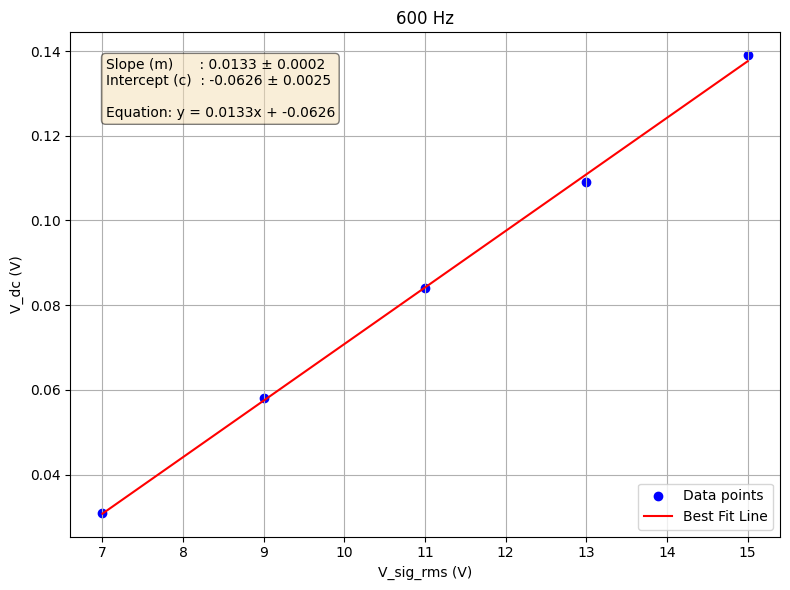

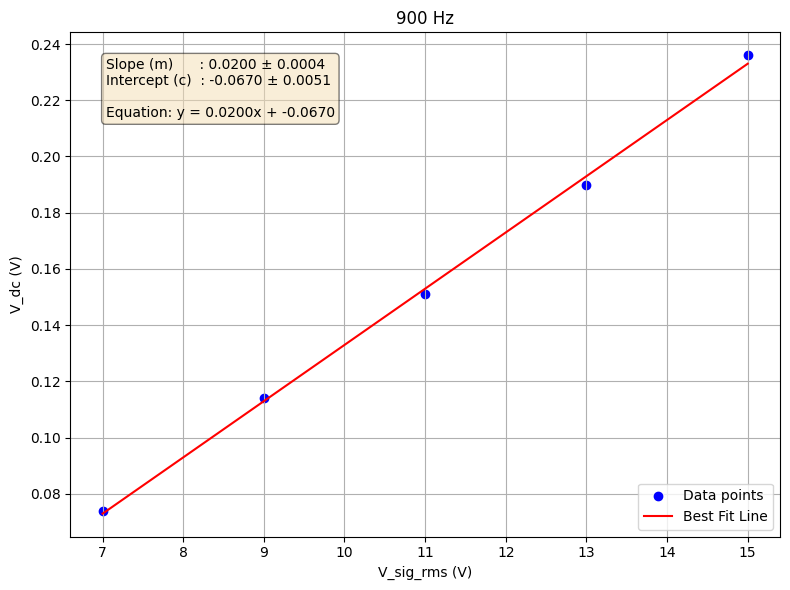

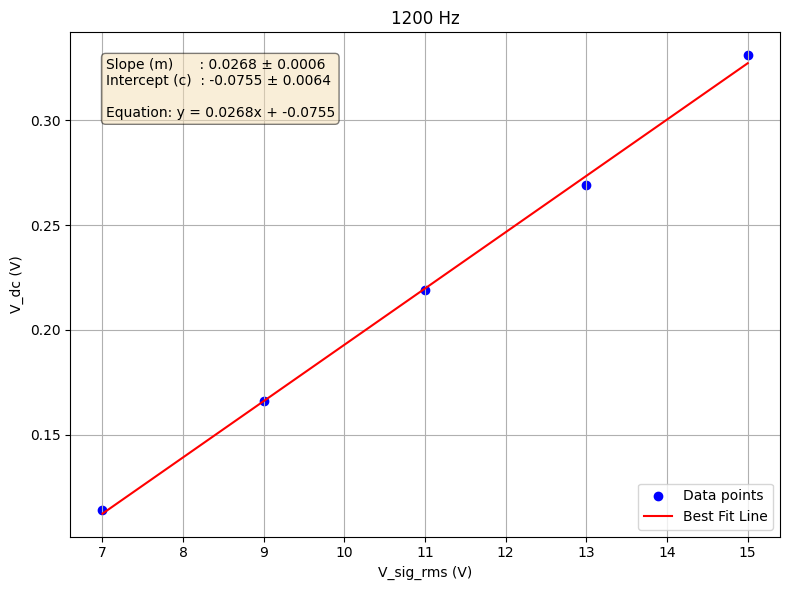

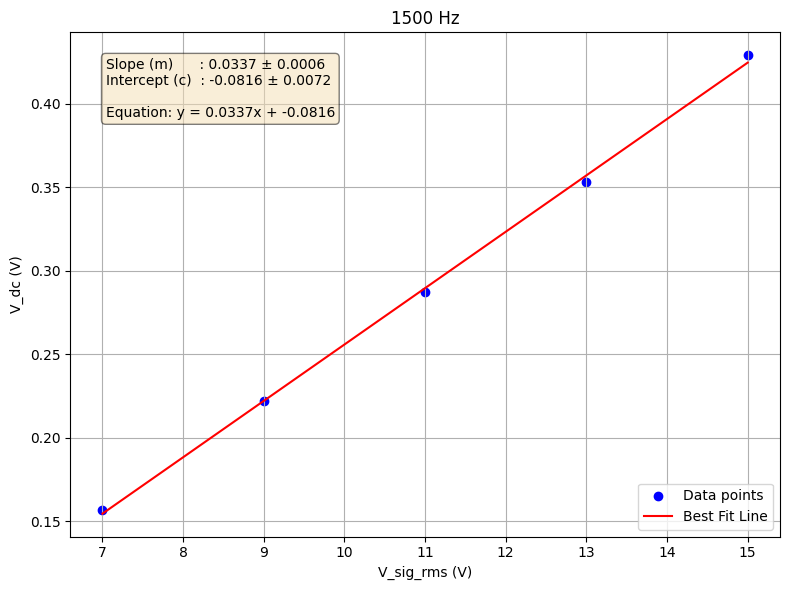

In [53]:
#gain = 100
Vrms = [ 7, 9, 11, 13, 15 ]
Vdc600=[0.031,0.058,0.084,0.109,0.139]
vdc900=[0.074,0.114,0.151,0.19,0.236]
vdc1200=[0.114,0.166,0.219,0.269,0.331]
vdc1500=[0.157,0.222,0.287,0.353,0.429]
least_squares_analysis(Vrms, Vdc600, title="600 Hz", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(Vrms, vdc900, title="900 Hz", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(Vrms, vdc1200, title="1200 Hz", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(Vrms, vdc1500, title="1500 Hz", xlab="V_sig_rms (V)", ylab="V_dc (V)")

plt.show()

Generating single plot with 4 datasets...


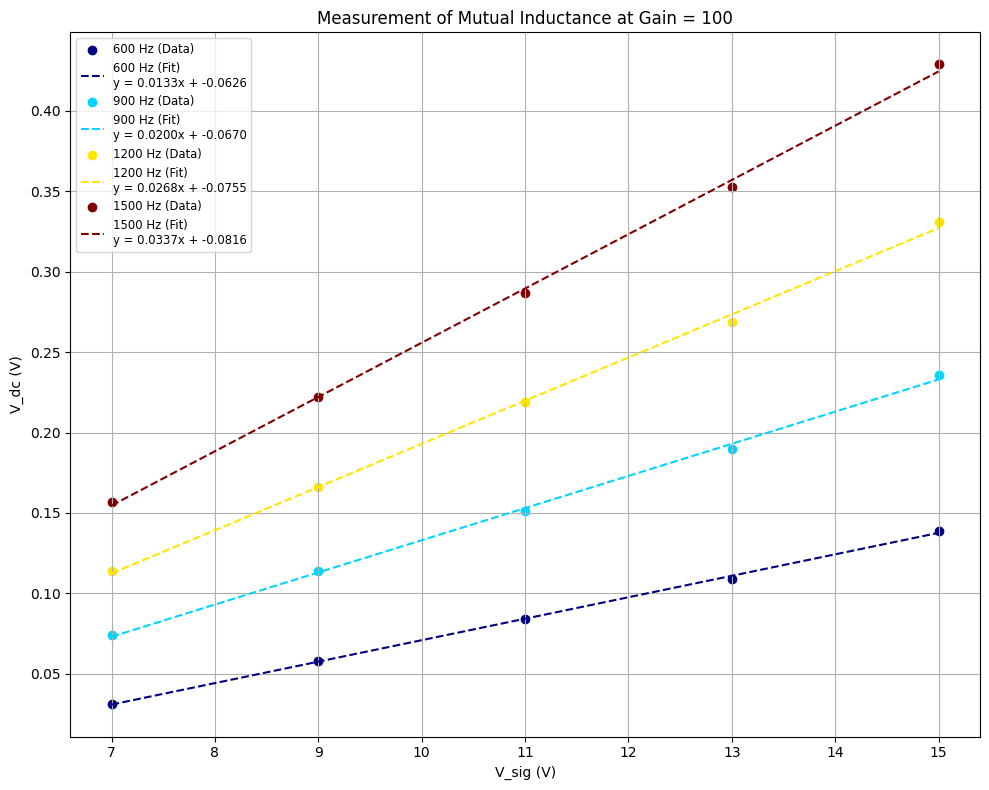


--- Combined Analysis Results ---

Results for: 600 Hz
  Equation: y = 0.0133x + -0.0626
  Slope (m)      : 0.0133 ± 0.0002
  Intercept (c)  : -0.0626 ± 0.0025

Results for: 900 Hz
  Equation: y = 0.0200x + -0.0670
  Slope (m)      : 0.0200 ± 0.0004
  Intercept (c)  : -0.0670 ± 0.0051

Results for: 1200 Hz
  Equation: y = 0.0268x + -0.0755
  Slope (m)      : 0.0268 ± 0.0006
  Intercept (c)  : -0.0755 ± 0.0064

Results for: 1500 Hz
  Equation: y = 0.0337x + -0.0816
  Slope (m)      : 0.0337 ± 0.0006
  Intercept (c)  : -0.0816 ± 0.0072


--- Summary Table: Gain = 100 ---
                Slope (m)  Slope Error (±)
Frequency (Hz)                            
600                0.0133           0.0002
900                0.0200           0.0004
1200               0.0268           0.0006
1500               0.0337           0.0006


--- Performing Slope vs. Frequency Analysis ---
Generating new plot: Slope vs. Frequency...


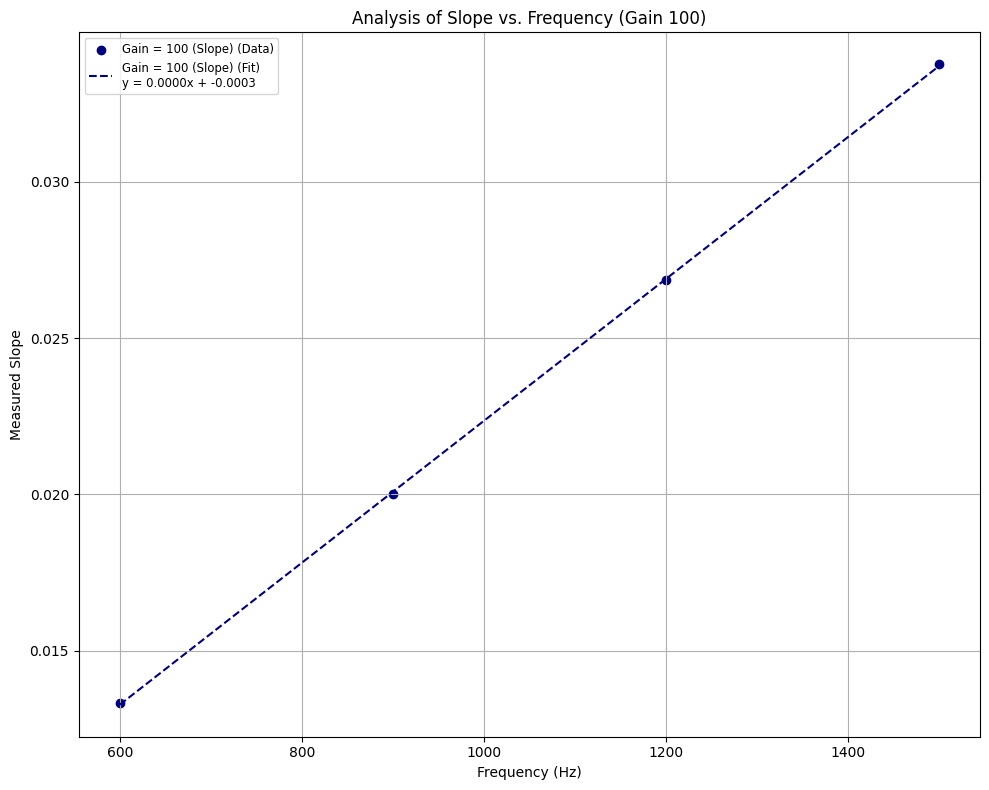


--- Results for Slope vs. Frequency Analysis ---

Results for: Gain = 100 (Slope)
  Equation: y = 0.000023x + -0.0003
  Slope (m)      : 0.000023 ± 0.000000
  Intercept (c)  : -0.0003 ± 0.0002


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_multi_least_squares(datasets, title="Least Squares Analysis", xlab='x', ylab='y', ax=None):
    """
    Perform least squares regression for multiple datasets and show them on a plot.
    If 'ax' is provided, plots onto that axis. Otherwise, creates a new figure.

    Parameters
    ----------
    datasets : list of dicts
        List where each dict contains 'x', 'y', and 'label' for a dataset.
        e.g., [{'x': [1,2], 'y': [1,2], 'label': 'Set 1'}, ...]
    title : str, optional
        Title for the figure.
    xlab : str, optional
        Label for the x-axis.
    ylab : str, optional
        Label for the y-axis.
    ax : matplotlib.axes.Axes, optional
        The axes object to plot on. If None, creates a new figure and axes.
    """
    
    # --- Figure Setup ---
    # If no axes are passed, create a new figure and axes
    if ax is None:
        fig, ax_new = plt.subplots(figsize=(10, 8))
        show_plot = True # We need to call plt.show()
    else:
        ax_new = ax   # Use the provided axes
        show_plot = False # Assume the caller will handle plt.show()

    colors = plt.cm.jet(np.linspace(0, 1, len(datasets)))
    all_results = []

    # --- Loop through each dataset ---
    for i, dataset in enumerate(datasets):
        y_values = dataset['y']
        x_values = dataset['x']
        label = dataset.get('label', f'Dataset {i+1}')
        
        # Convert to numpy arrays
        y = np.array(y_values, dtype=float)
        x = np.array(x_values, dtype=float)
        N = len(x)
        
        if N < 2:
            print(f"Skipping dataset '{label}': needs at least 2 data points.")
            continue
            
        if len(y) != N:
            print(f"Skipping dataset '{label}': x and y length mismatch.")
            continue

        # Perform least-squares fit: y = m*x + c
        A = np.vstack([x, np.ones(N)]).T
        try:
            slope, intercept = np.linalg.lstsq(A, y, rcond=None)[0]
        except np.linalg.LinAlgError as e:
            print(f"Skipping dataset '{label}': Least squares fit failed. {e}")
            continue

        # Fitted values and residuals
        y_fit = slope * x + intercept
        residuals = y - y_fit

        # --- Error Calculations ---
        # Check for degrees of freedom
        if N <= 2:
            print(f"Skipping error calculation for '{label}': needs more than 2 data points.")
            err_slope = np.nan
            err_intercept = np.nan
            sigma_y = np.nan
        else:
            # Standard error of the estimate (sigma_y)
            sigma_y = np.sqrt(np.sum(residuals**2) / (N - 2))
            
            # Sum of squares of x
            Sxx = np.sum((x - np.mean(x))**2)
            
            if Sxx == 0:
                print(f"Skipping error calculation for '{label}': Sxx is zero (all x values are the same).")
                err_slope = np.nan
                err_intercept = np.nan
            else:
                # Error in slope (standard error)
                err_slope = sigma_y / np.sqrt(Sxx)
                
                # Error in intercept (standard error)
                err_intercept = sigma_y * np.sqrt(np.sum(x**2) / (N * Sxx))

        # --- Plotting ---
        color = colors[i]
        # Plot data points
        ax_new.scatter(x, y, color=color, label=f"{label} (Data)")
        
        # Plot fit line
        fit_label = f"{label} (Fit)\ny = {slope:.4f}x + {intercept:.4f}"
        ax_new.plot(x, y_fit, color=color, linestyle='--', label=fit_label)
        
        # --- Store Results ---
        all_results.append({
            "label": label,
            "slope": slope,
            "intercept": intercept,
            "slope_error": err_slope,
            "intercept_error": err_intercept
        })

    # --- Final Figure Touches ---
    ax_new.set_xlabel(xlab)
    ax_new.set_ylabel(ylab)
    ax_new.legend(fontsize='small')
    ax_new.set_title(title)
    ax_new.grid(True)

    if show_plot:
        plt.tight_layout()
        plt.show()

    # Return results
    return all_results


if __name__ == '__main__':
    # --- Data from your last request ---
    # gain = 100
    Vrms = [ 7, 9, 11, 13, 15 ]
    Vdc600=[0.031,0.058,0.084,0.109,0.139]
    vdc900=[0.074,0.114,0.151,0.19,0.236]
    vdc1200=[0.114,0.166,0.219,0.269,0.331]
    vdc1500=[0.157,0.222,0.287,0.353,0.429]

    # --- Create list of ALL datasets ---
    all_datasets_info = [
        {'x': Vrms, 'y': Vdc600,  'label': '600 Hz'},
        {'x': Vrms, 'y': vdc900,  'label': '900 Hz'},
        {'x': Vrms, 'y': vdc1200, 'label': '1200 Hz'},
        {'x': Vrms, 'y': vdc1500, 'label': '1500 Hz'},
    ]

    # --- Create a single figure with one plot ---
    print("Generating single plot with 4 datasets...")
    
    # Call the function for all datasets on a single plot
    all_analysis_results = plot_multi_least_squares(
        all_datasets_info,
        title="Measurement of Mutual Inductance at Gain = 100",
        xlab="V_sig (V)",
        ylab="V_dc (V)"
        # ax=None, so it will create its own figure and show it
    )

    # --- Print all results ---
    print("\n--- Combined Analysis Results ---")
    
    # Prepare data for tables
    gain_100_data = []

    for res in all_analysis_results:
        # Print individual results
        print(f"\nResults for: {res['label']}")
        print(f"  Equation: y = {res['slope']:.4f}x + {res['intercept']:.4f}")
        print(f"  Slope (m)      : {res['slope']:.4f} ± {res['slope_error']:.4f}")
        print(f"  Intercept (c)  : {res['intercept']:.4f} ± {res['intercept_error']:.4f}")

        # Extract data for summary tables
        label = res['label']
        try:
            # Parse '600 Hz' format
            parts = label.split(' ')
            freq = int(parts[0])
            gain = 100 # Assumed from your comment
            
            table_row = {
                "Frequency (Hz)": freq,
                "Slope (m)": res['slope'],
                "Slope Error (±)": res['slope_error']
            }
            
            if gain == 100:
                gain_100_data.append(table_row)
                
        except Exception as e:
            print(f"Could not parse label '{label}' for table: {e}")

    # --- Create and Print Tables ---
    
    # Sort data by frequency before creating DataFrame
    gain_100_data.sort(key=lambda x: x['Frequency (Hz)'])

    # Set display options for pandas
    pd.set_option('display.float_format', '{:.4f}'.format)

    if gain_100_data:
        print("\n\n" + "="*35)
        print("--- Summary Table: Gain = 100 ---")
        print("="*35)
        df_100 = pd.DataFrame(gain_100_data)
        df_100.set_index("Frequency (Hz)", inplace=True)
        print(df_100)

    # --- NEW: Perform second analysis (Slope vs. Frequency) ---
    print("\n\n" + "="*50)
    print("--- Performing Slope vs. Frequency Analysis ---")
    print("="*50)

    try:
        # Extract data from the sorted table data lists
        frequencies_100 = [d['Frequency (Hz)'] for d in gain_100_data]
        slopes_100 = [d['Slope (m)'] for d in gain_100_data]

        if not frequencies_100 or not slopes_100:
            print("Could not find slope data to perform second analysis.")
        else:
            # Create a new list of datasets for the slope analysis
            slope_dataset_100 = {
                'x': frequencies_100,
                'y': slopes_100,
                'label': 'Gain = 100 (Slope)'
            }

            # --- Create a NEW figure with 1 plot ---
            print("Generating new plot: Slope vs. Frequency...")
            
            all_slope_results = plot_multi_least_squares(
                [slope_dataset_100], # Pass as a list with one item
                title="Analysis of Slope vs. Frequency (Gain 100)",
                xlab="Frequency (Hz)",
                ylab="Measured Slope"
                # ax=None, so it creates a new plot
            )
            
            print("\n--- Results for Slope vs. Frequency Analysis ---")
            for res in all_slope_results:
                print(f"\nResults for: {res['label']}")
                print(f"  Equation: y = {res['slope']:.6f}x + {res['intercept']:.4f}")
                print(f"  Slope (m)      : {res['slope']:.6f} ± {res['slope_error']:.6f}")
                print(f"  Intercept (c)  : {res['intercept']:.4f} ± {res['intercept_error']:.4f}")

    except Exception as e:
        print(f"\nAn error occurred during the Slope vs. Frequency analysis: {e}")

# Resistance

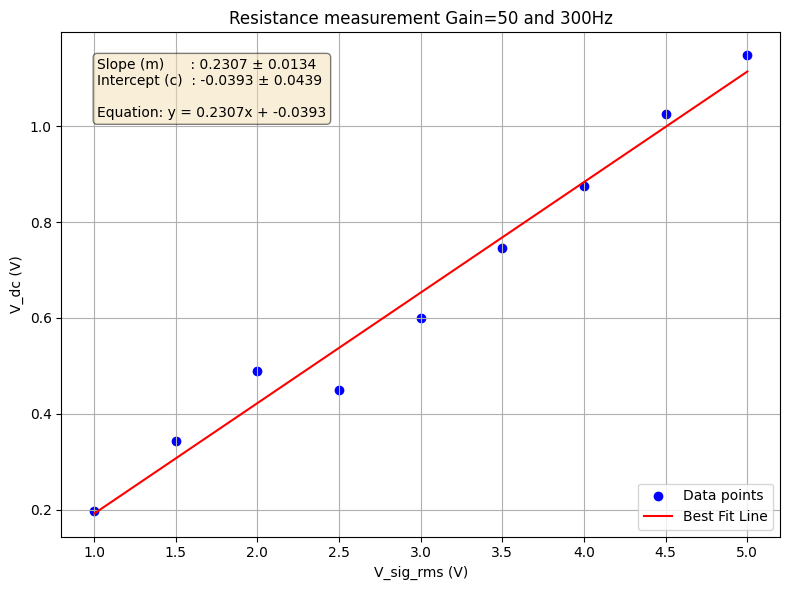

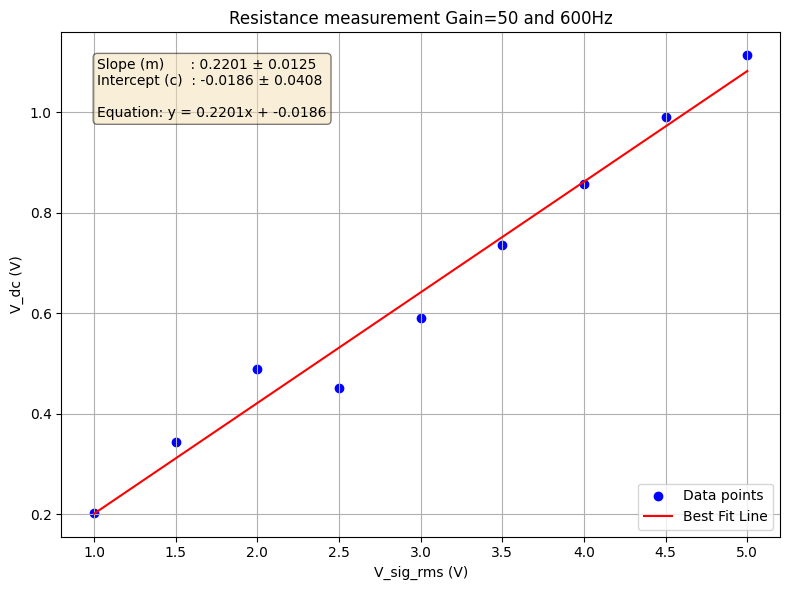

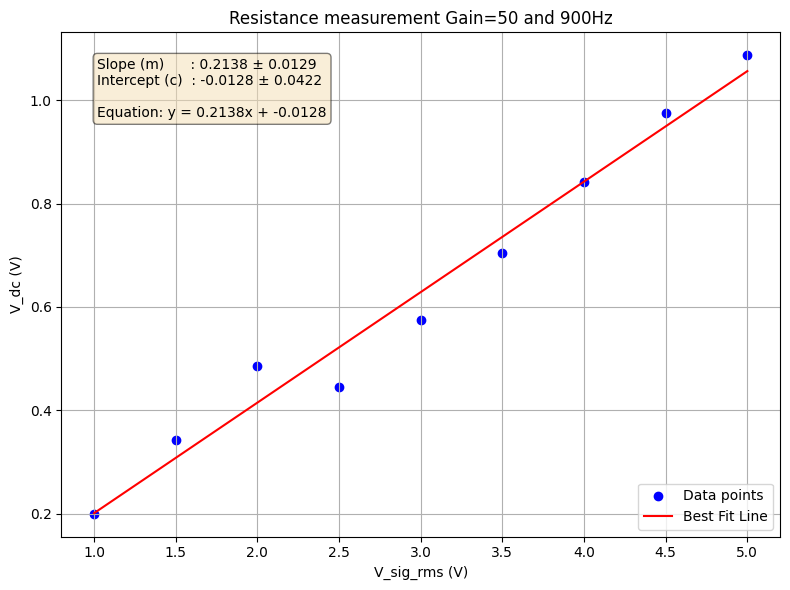

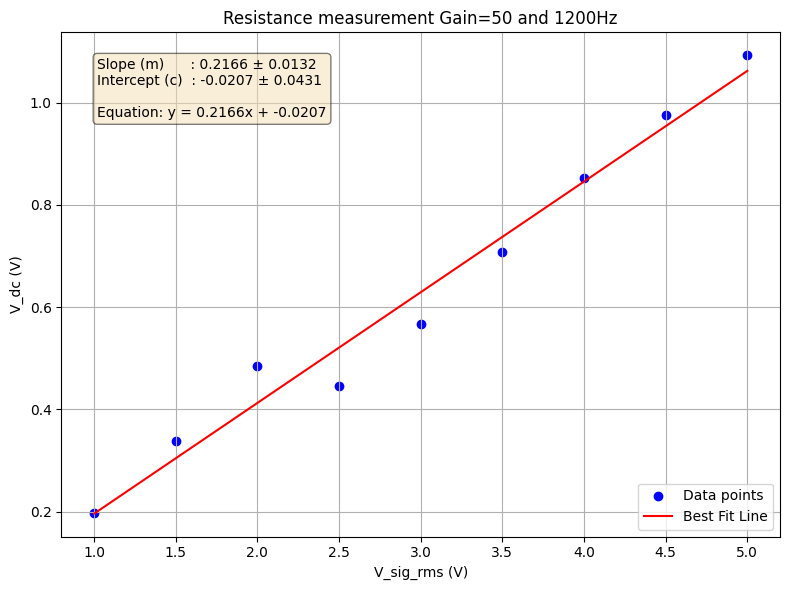

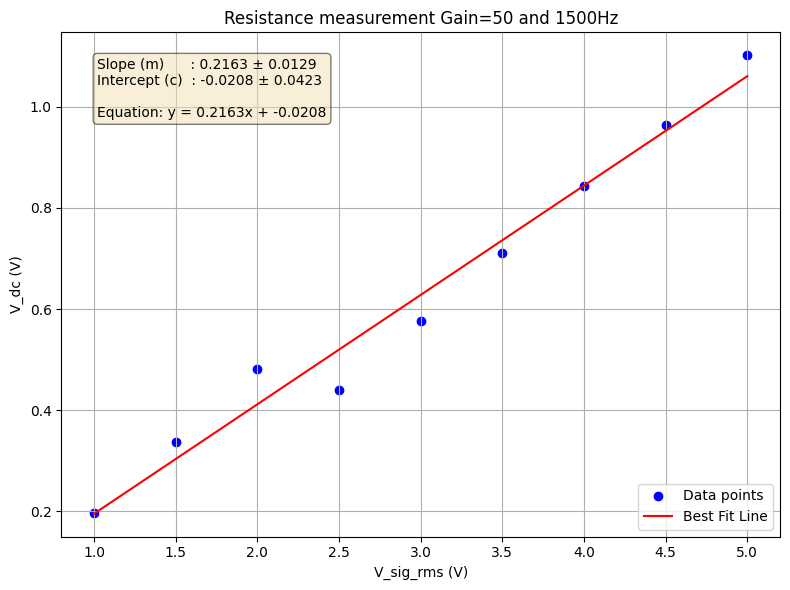

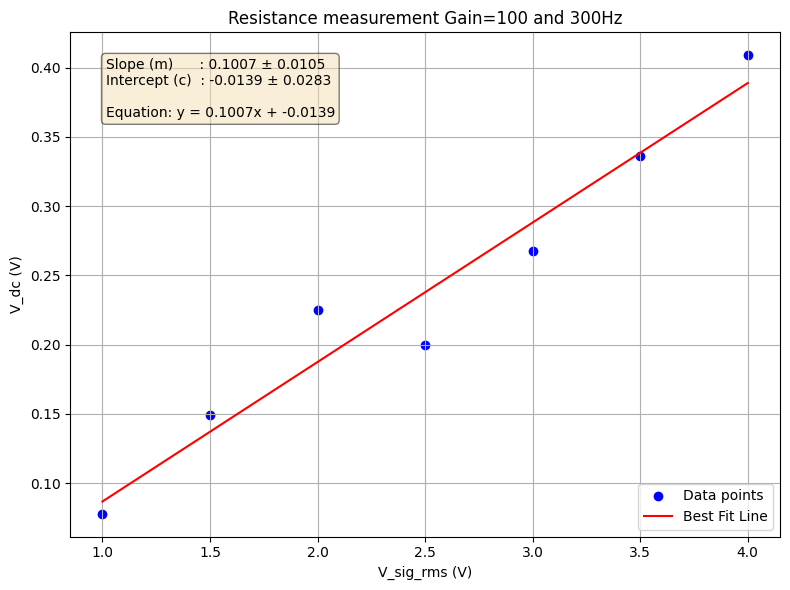

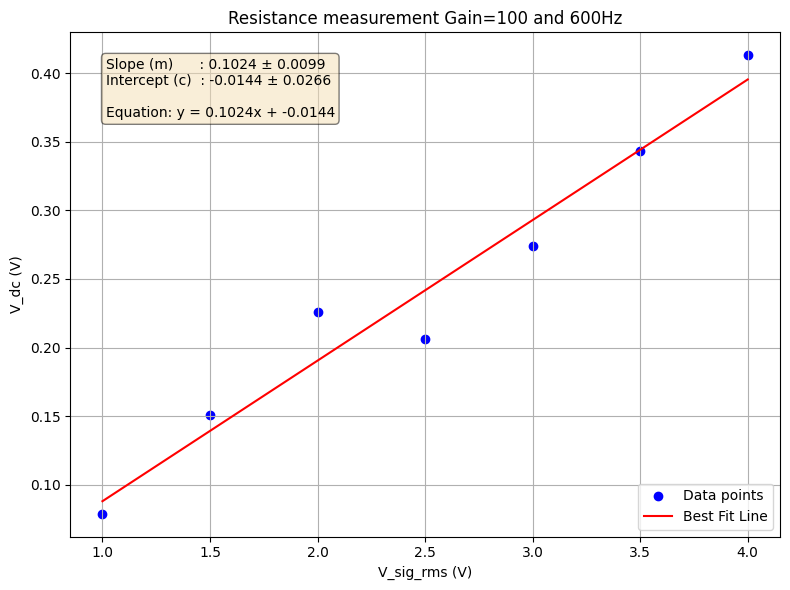

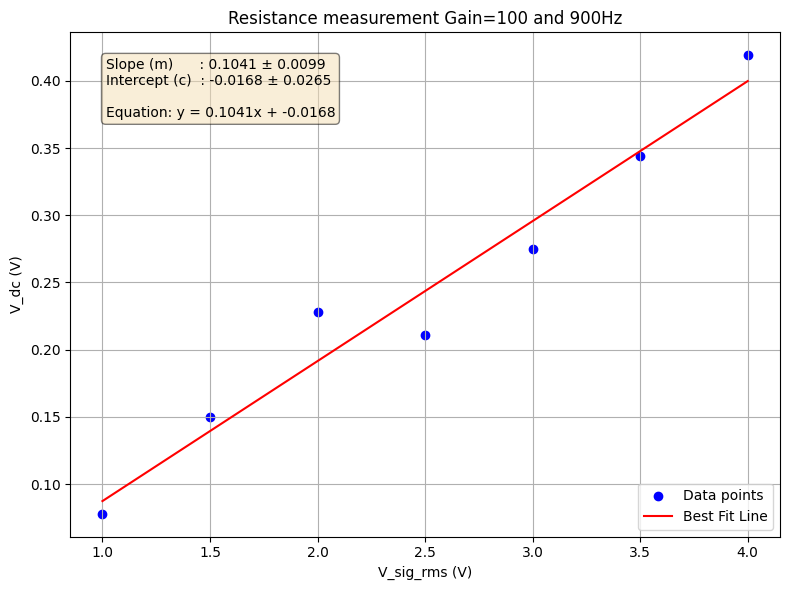

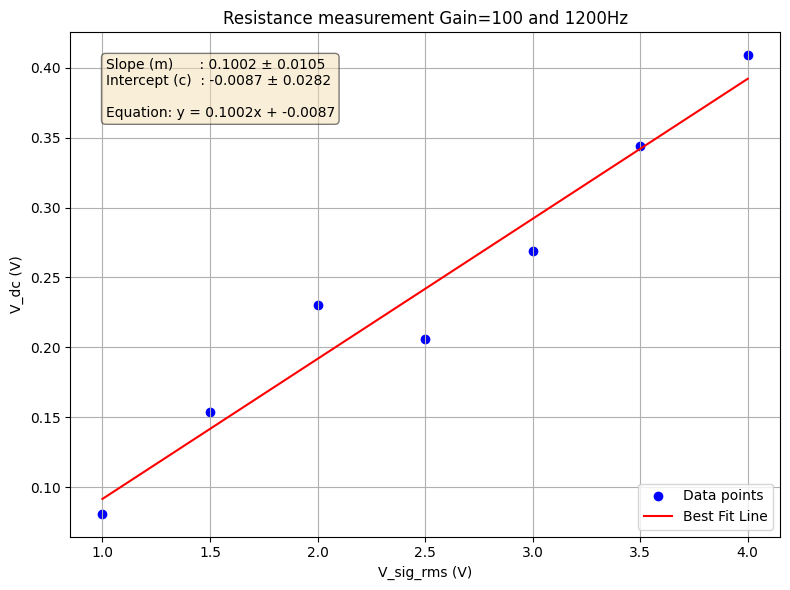

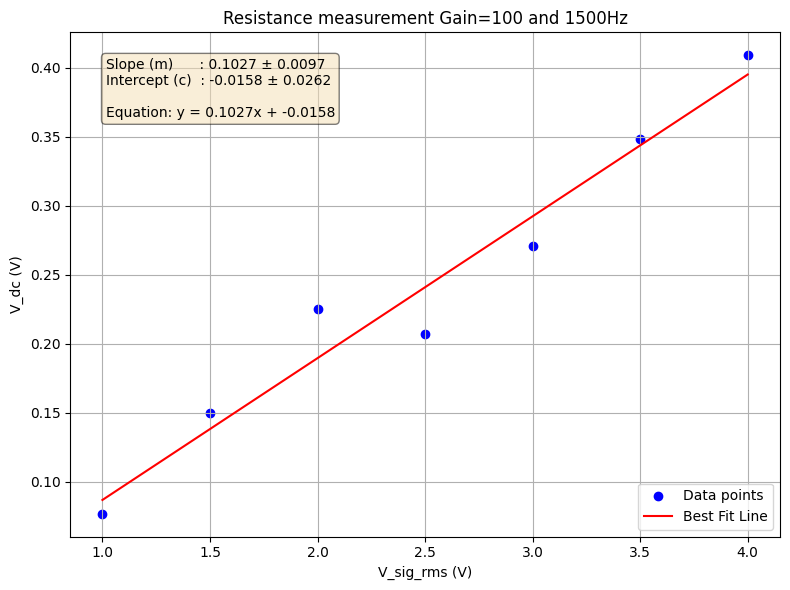

{}

In [58]:
#gain = 100
vrms_res = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

vdc_res50_300=[0.197,0.344,0.489,0.449,0.6,0.745,0.876,1.026,1.148]
vdc_res50_600=[0.202,0.344,0.49,0.451,0.591,0.736,0.856,0.991,1.113]
vdc_res50_900=[0.2,0.343,0.486,0.446,0.574,0.705,0.842,0.975,1.087]
vdc_res50_1200=[0.197,0.339,0.484,0.445,0.567,0.708,0.853,0.977,1.093]
vdc_res50_1500=[0.197,0.338,0.482,0.441,0.576,0.71,0.843,0.964,1.102]


#gain = 50
vrms_res_50 = [1, 1.5, 2, 2.5, 3, 3.5, 4]

vdc_res100_300=[0.078,0.149,0.225,0.2,0.268,0.336,0.409]
vdc_res100_600=[0.079,0.151,0.226,0.206,0.274,0.343,0.413]
vdc_res100_900=[0.078,0.15,0.228,0.211,0.275,0.344,0.419]
vdc_res100_1200=[0.081,0.154,0.23,0.206,0.269,0.344,0.409]
vdc_res100_1500=[0.077,0.15,0.225,0.207,0.271,0.348,0.409]
least_squares_analysis(vrms_res, vdc_res50_300, title="Resistance measurement Gain=50 and 300Hz", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(vrms_res, vdc_res50_600, title="Resistance measurement Gain=50 and 600Hz", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(vrms_res, vdc_res50_900, title="Resistance measurement Gain=50 and 900Hz", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(vrms_res, vdc_res50_1200, title="Resistance measurement Gain=50 and 1200Hz", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(vrms_res, vdc_res50_1500, title="Resistance measurement Gain=50 and 1500Hz", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(vrms_res_50, vdc_res100_300, title="Resistance measurement Gain=100 and 300Hz", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(vrms_res_50, vdc_res100_600, title="Resistance measurement Gain=100 and 600Hz", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(vrms_res_50, vdc_res100_900, title="Resistance measurement Gain=100 and 900Hz", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(vrms_res_50, vdc_res100_1200, title="Resistance measurement Gain=100 and 1200Hz", xlab="V_sig_rms (V)", ylab="V_dc (V)")
least_squares_analysis(vrms_res_50, vdc_res100_1500, title="Resistance measurement Gain=100 and 1500Hz", xlab="V_sig_rms (V)", ylab="V_dc (V)")



In [59]:
#calibration data 50
calib_f=[300,600,900,1200,1500]
calib_slopes=[0.278,0.350,0.340,0.390,0.392]

#calibration data 100
calib_f_100=[300,600,900,1200,1500]
calib_slopes_100=[0.756, 0.767, 0.761, 0.755, 0.766]


Performing analysis for: f=300 Gain=50...
Performing analysis for: f=600 Gain=50...
Performing analysis for: f=900 Gain=50...
Performing analysis for: f=1200 Gain=50...
Performing analysis for: f=1500 Gain=50...
Performing analysis for: f=300 Gain=100...
Performing analysis for: f=600 Gain=100...
Performing analysis for: f=900 Gain=100...
Performing analysis for: f=1200 Gain=100...
Performing analysis for: f=1500 Gain=100...


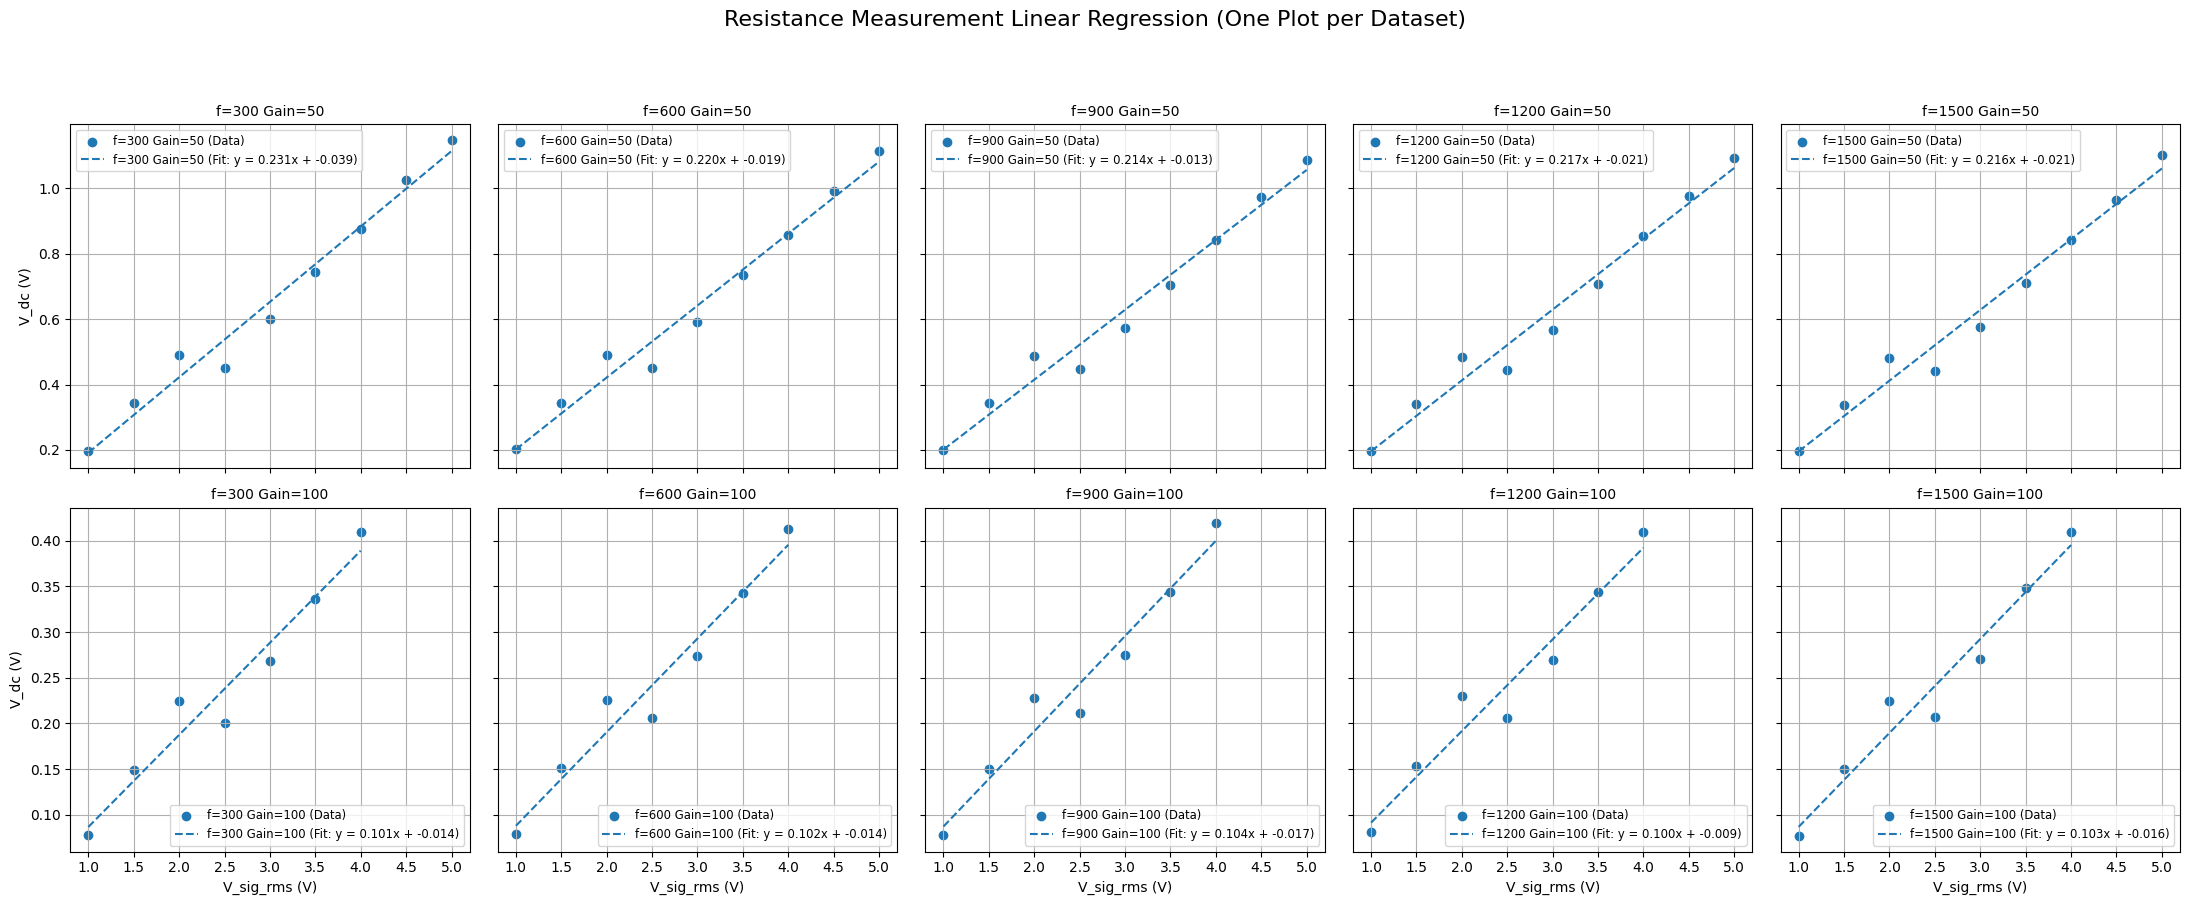


--- Combined Analysis Results ---

Results for: f=300 Gain=50
  Equation: y = 0.2307x + -0.0393
  Slope (m)      : 0.2307 ± 0.0134
  Intercept (c)  : -0.0393 ± 0.0439

Results for: f=600 Gain=50
  Equation: y = 0.2201x + -0.0186
  Slope (m)      : 0.2201 ± 0.0125
  Intercept (c)  : -0.0186 ± 0.0408

Results for: f=900 Gain=50
  Equation: y = 0.2138x + -0.0128
  Slope (m)      : 0.2138 ± 0.0129
  Intercept (c)  : -0.0128 ± 0.0422

Results for: f=1200 Gain=50
  Equation: y = 0.2166x + -0.0207
  Slope (m)      : 0.2166 ± 0.0132
  Intercept (c)  : -0.0207 ± 0.0431

Results for: f=1500 Gain=50
  Equation: y = 0.2163x + -0.0208
  Slope (m)      : 0.2163 ± 0.0129
  Intercept (c)  : -0.0208 ± 0.0423

Results for: f=300 Gain=100
  Equation: y = 0.1007x + -0.0139
  Slope (m)      : 0.1007 ± 0.0105
  Intercept (c)  : -0.0139 ± 0.0283

Results for: f=600 Gain=100
  Equation: y = 0.1024x + -0.0144
  Slope (m)      : 0.1024 ± 0.0099
  Intercept (c)  : -0.0144 ± 0.0266

Results for: f=900 Gain=100
 

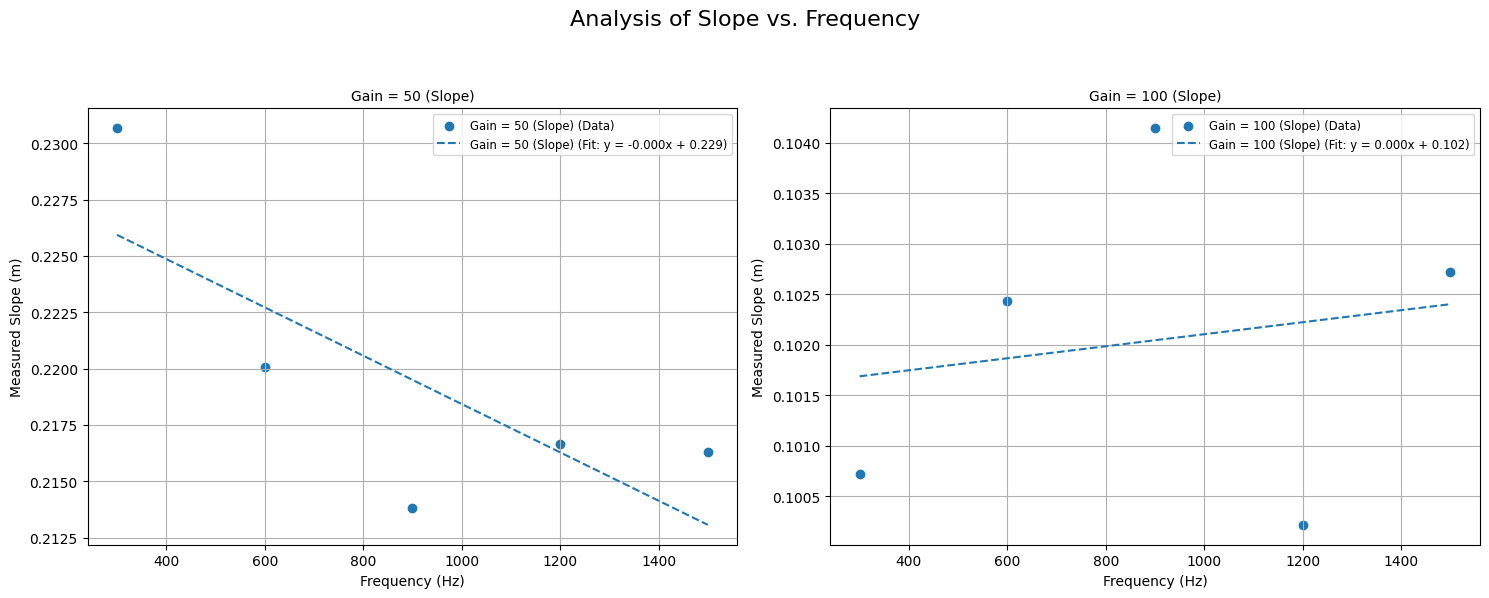


--- Results for Slope vs. Frequency Analysis ---

Results for: Gain = 50 (Slope)
  Equation: y = -0.000011x + 0.2292
  Slope (m)      : -0.000011 ± 0.000005
  Intercept (c)  : 0.2292 ± 0.0051

Results for: Gain = 100 (Slope)
  Equation: y = 0.000001x + 0.1015
  Slope (m)      : 0.000001 ± 0.000002
  Intercept (c)  : 0.1015 ± 0.0019


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_multi_least_squares(datasets, title="Least Squares Analysis", xlab='x', ylab='y', ax=None):
    """
    Perform least squares regression for multiple datasets and plot them on a single figure.

    Parameters
    ----------
    datasets : list of dicts
        A list where each dictionary contains data for one set.
        Each dict should have:
        - 'y': (list or array) Dependent variable values.
        - 'x': (list or array, optional) Independent variable values. If None, uses 1, 2, ..., N.
        - 'label': (str, optional) A label for this dataset.
    title : str, optional
        Title for the plot.
    xlab : str, optional
        Label for the x-axis.
    ylab : str, optional
        Label for the y-axis.
    ax : matplotlib.axes.Axes, optional
        An existing axes object to plot on. If None, a new figure and axes will be created.
    """

    # --- Figure Handling ---
    if ax is None:
        # If no axes are provided, create a new figure and axes
        fig, ax = plt.subplots(figsize=(10, 8))
        show_plot = True
    else:
        # If axes are provided, use them and get their figure
        fig = ax.get_figure()
        show_plot = False # Don't show the plot automatically, let the caller decide

    all_results = []

    # Use matplotlib's default color cycle
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    for i, dataset in enumerate(datasets):
        color = colors[i % len(colors)]
        
        # --- Data Preparation ---
        y_values = dataset.get('y')
        if y_values is None:
            print(f"Skipping dataset {i} due to missing 'y' data.")
            continue
            
        x_values = dataset.get('x')
        label = dataset.get('label', f'Dataset {i+1}')

        # Convert to numpy arrays
        y = np.array(y_values, dtype=float)
        if x_values is None:
            x = np.arange(1, len(y) + 1, dtype=float)
        else:
            x = np.array(x_values, dtype=float)

        if len(x) != len(y):
            print(f"Skipping dataset '{label}': x and y have different lengths.")
            continue
        
        # --- Perform least-squares fit: y = m*x + c ---
        A = np.vstack([x, np.ones(len(x))]).T
        try:
            slope, intercept = np.linalg.lstsq(A, y, rcond=None)[0]
        except np.linalg.LinAlgError as e:
            print(f"Failed to fit dataset '{label}': {e}")
            continue

        # Fitted values and residuals
        y_fit = slope * x + intercept
        residuals = y - y_fit
        N = len(x)

        # --- Error Calculations ---
        err_slope = np.nan
        err_intercept = np.nan
        sigma_y = np.nan
        Sxx = np.nan

        # Errors can only be calculated if N > 2 (degrees of freedom > 0)
        if N > 2:
            try:
                # Standard error of the estimate (sigma_y)
                sigma_y = np.sqrt(np.sum(residuals**2) / (N - 2))
                
                # Sum of squares of x
                Sxx = np.sum((x - np.mean(x))**2)
                
                if Sxx > 0: # Avoid division by zero
                    # Error in slope (standard error)
                    err_slope = sigma_y / np.sqrt(Sxx)

                    # Error in intercept (standard error)
                    err_intercept = sigma_y * np.sqrt(np.sum(x**2) / (N * Sxx))
            except Exception as e:
                print(f"Warning: Could not calculate errors for '{label}': {e}")
                
        # --- Store Results ---
        results = {
            "label": label,
            "slope": slope,
            "intercept": intercept,
            "slope_error": err_slope,
            "intercept_error": err_intercept,
            "N": N,
            "sigma_y": sigma_y,
            "Sxx": Sxx
        }
        all_results.append(results)

        # --- Plotting ---
        # Plot data points
        ax.scatter(x, y, color=color, label=f"{label} (Data)")
        
        # Plot best-fit line
        fit_label = f"{label} (Fit: y = {slope:.3f}x + {intercept:.3f})"
        ax.plot(x, y_fit, color=color, linestyle='--', label=fit_label)

    # --- Finalize Plot ---
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.legend(fontsize='small') # Use smaller font for legend if it's crowded
    ax.set_title(title, fontsize='medium') # Use medium font for subplot titles
    ax.grid(True)
    
    if show_plot:
        # If we created our own figure, apply tight_layout and show it
        fig.tight_layout()
        plt.show()

    # Return results
    return all_results


if __name__ == '__main__':
    # --- Data from your second request (Resistance Measurement) ---
    
    #gain = 100
    vrms_res = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

    vdc_res50_300=[0.197,0.344,0.489,0.449,0.6,0.745,0.876,1.026,1.148]
    vdc_res50_600=[0.202,0.344,0.49,0.451,0.591,0.736,0.856,0.991,1.113]
    vdc_res50_900=[0.2,0.343,0.486,0.446,0.574,0.705,0.842,0.975,1.087]
    vdc_res50_1200=[0.197,0.339,0.484,0.445,0.567,0.708,0.853,0.977,1.093]
    vdc_res50_1500=[0.197,0.338,0.482,0.441,0.576,0.71,0.843,0.964,1.102]


    #gain = 50
    vrms_res_50 = [1, 1.5, 2, 2.5, 3, 3.5, 4]

    vdc_res100_300=[0.078,0.149,0.225,0.2,0.268,0.336,0.409]
    vdc_res100_600=[0.079,0.151,0.226,0.206,0.274,0.343,0.413]
    vdc_res100_900=[0.078,0.15,0.228,0.211,0.275,0.344,0.419]
    vdc_res100_1200=[0.081,0.154,0.23,0.206,0.269,0.344,0.409]
    vdc_res100_1500=[0.077,0.15,0.225,0.207,0.271,0.348,0.409]

    # --- Create list of ALL datasets ---
    all_datasets_info = [
        # Gain=50 (based on your titles)
        {'x': vrms_res, 'y': vdc_res50_300, 'label': 'f=300 Gain=50'},
        {'x': vrms_res, 'y': vdc_res50_600, 'label': 'f=600 Gain=50'},
        {'x': vrms_res, 'y': vdc_res50_900, 'label': 'f=900 Gain=50'},
        {'x': vrms_res, 'y': vdc_res50_1200, 'label': 'f=1200 Gain=50'},
        {'x': vrms_res, 'y': vdc_res50_1500, 'label': 'f=1500 Gain=50'},
        # Gain=100 (based on your titles)
        {'x': vrms_res_50, 'y': vdc_res100_300, 'label': 'f=300 Gain=100'},
        {'x': vrms_res_50, 'y': vdc_res100_600, 'label': 'f=600 Gain=100'},
        {'x': vrms_res_50, 'y': vdc_res100_900, 'label': 'f=900 Gain=100'},
        {'x': vrms_res_50, 'y': vdc_res100_1200, 'label': 'f=1200 Gain=100'},
        {'x': vrms_res_50, 'y': vdc_res100_1500, 'label': 'f=1500 Gain=100'},
    ]

    # --- Create a single figure with a 2x5 grid of subplots ---
    fig, axes = plt.subplots(
        nrows=2, 
        ncols=5, 
        figsize=(22, 9), # Adjusted for better aspect ratio
        sharex='col',     # Share x-axis *per column* (data is different)
        sharey='row'      # Share y-axis *per row* (Gain 50 / Gain 100)
    )
    
    # Flatten the 2D array of axes for easy iteration
    axes_flat = axes.flatten()
    
    fig.suptitle("Resistance Measurement Linear Regression (One Plot per Dataset)", fontsize=16, y=1.03)

    all_analysis_results = []

    # --- Loop and call the function for each dataset on its own subplot ---
    for i, dataset_info in enumerate(all_datasets_info):
        ax = axes_flat[i]
        
        # We wrap the single dataset_info dict in a list because
        # plot_multi_least_squares expects a list of datasets
        dataset_list = [dataset_info] 
        
        # Set x/y labels only for the outer plots to reduce clutter
        set_xlab = (i >= 5) # Only set x-label for the bottom row (indices 5-9)
        set_ylab = (i % 5 == 0) # Only set y-label for the left column (indices 0, 5)

        xlab = "V_sig_rms (V)" if set_xlab else ""
        ylab = "V_dc (V)" if set_ylab else ""
        
        # Use a more descriptive title for the subplot
        title = f"{dataset_info['label']}"

        print(f"Performing analysis for: {dataset_info['label']}...")
        results = plot_multi_least_squares(
            dataset_list,
            title=title,
            xlab=xlab,
            ylab=ylab,
            ax=ax  # Pass the specific subplot's axes
        )
        all_analysis_results.extend(results)

    # --- Show the single figure with all 10 plots ---
    fig.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to make room for suptitle
    plt.show()

    # --- Print all results ---
    print("\n--- Combined Analysis Results ---")
    
    # Prepare data for tables
    gain_50_data = []
    gain_100_data = []

    for res in all_analysis_results:
        # Print individual results
        print(f"\nResults for: {res['label']}")
        print(f"  Equation: y = {res['slope']:.4f}x + {res['intercept']:.4f}")
        print(f"  Slope (m)      : {res['slope']:.4f} ± {res['slope_error']:.4f}")
        print(f"  Intercept (c)  : {res['intercept']:.4f} ± {res['intercept_error']:.4f}")

        # Extract data for summary tables
        label = res['label']
        try:
            # Parse 'f=300 Gain=50' format
            parts = label.split(' ')
            freq_str = parts[0].split('=')[1]
            gain_str = parts[1].split('=')[1]
            
            freq = int(freq_str)
            gain = int(gain_str)
            
            table_row = {
                "Frequency (Hz)": freq,
                "Slope (m)": res['slope'],
                "Slope Error (±)": res['slope_error']
            }
            
            if gain == 50:
                gain_50_data.append(table_row)
            elif gain == 100:
                gain_100_data.append(table_row)
                
        except Exception as e:
            print(f"Could not parse label '{label}' for table: {e}")

    # --- Create and Print Tables ---
    
    # Sort data by frequency before creating DataFrame
    gain_50_data.sort(key=lambda x: x['Frequency (Hz)'])
    gain_100_data.sort(key=lambda x: x['Frequency (Hz)'])

    # Set display options for pandas
    pd.set_option('display.float_format', '{:.4f}'.format)

    if gain_50_data:
        print("\n\n" + "="*35)
        print("--- Summary Table: Gain = 50 ---")
        print("="*35)
        df_50 = pd.DataFrame(gain_50_data)
        df_50.set_index("Frequency (Hz)", inplace=True)
        print(df_50)

    if gain_100_data:
        print("\n\n" + "="*35)
        print("--- Summary Table: Gain = 100 ---")
        print("="*35)
        df_100 = pd.DataFrame(gain_100_data)
        df_100.set_index("Frequency (Hz)", inplace=True)
        print(df_100)

    # --- NEW: Perform second analysis (Slope vs. Frequency) ---
    print("\n\n" + "="*50)
    print("--- Performing Slope vs. Frequency Analysis ---")
    print("="*50)

    try:
        # Extract data from the sorted table data lists
        frequencies_50 = [d['Frequency (Hz)'] for d in gain_50_data]
        slopes_50 = [d['Slope (m)'] for d in gain_50_data]
        
        frequencies_100 = [d['Frequency (Hz)'] for d in gain_100_data]
        slopes_100 = [d['Slope (m)'] for d in gain_100_data]

        if not frequencies_50 or not slopes_50 or not frequencies_100 or not slopes_100:
            print("Could not find slope data to perform second analysis.")
        else:
            # Create a new list of datasets for the slope analysis
            slope_dataset_50 = {
                'x': frequencies_50,
                'y': slopes_50,
                'label': 'Gain = 50 (Slope)'
            }
            slope_dataset_100 = {
                'x': frequencies_100,
                'y': slopes_100,
                'label': 'Gain = 100 (Slope)'
            }

            # --- Create a NEW figure with 1x2 subplots ---
            print("Generating new plot: Slope vs. Frequency (Separate Plots)...")
            fig_slope, axes_slope = plt.subplots(
                nrows=1, 
                ncols=2, 
                figsize=(15, 6),
                sharey=False # Don't share y-axis, slopes might be very different
            )
            
            fig_slope.suptitle("Analysis of Slope vs. Frequency", fontsize=16, y=1.02)
            all_slope_results = []

            # --- Plot Gain=50 on the left subplot (ax[0]) ---
            results_50 = plot_multi_least_squares(
                [slope_dataset_50], # Pass as a list with one item
                title=slope_dataset_50['label'],
                xlab="Frequency (Hz)",
                ylab="Measured Slope (m)",
                ax=axes_slope[0]
            )
            all_slope_results.extend(results_50)

            # --- Plot Gain=100 on the right subplot (ax[1]) ---
            results_100 = plot_multi_least_squares(
                [slope_dataset_100], # Pass as a list with one item
                title=slope_dataset_100['label'],
                xlab="Frequency (Hz)",
                ylab="Measured Slope (m)", # Add y-label here too
                ax=axes_slope[1]
            )
            all_slope_results.extend(results_100)

            fig_slope.tight_layout(rect=[0, 0.03, 1, 0.97])
            plt.show() # Show this new figure
            
            print("\n--- Results for Slope vs. Frequency Analysis ---")
            for res in all_slope_results:
                print(f"\nResults for: {res['label']}")
                print(f"  Equation: y = {res['slope']:.6f}x + {res['intercept']:.4f}")
                print(f"  Slope (m)      : {res['slope']:.6f} ± {res['slope_error']:.6f}")
                print(f"  Intercept (c)  : {res['intercept']:.4f} ± {res['intercept_error']:.4f}")

    except Exception as e:
        print(f"\nAn error occurred during the Slope vs. Frequency analysis: {e}")